In [2]:
import numpy as np
import pandas as pd
import os
import time
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
path_folder=os.path.normcase(r'C:\Users\dell\Downloads\Titanic-maching-learning-from-disaster')
train_data=pd.read_csv(os.path.join(path_folder,'train.csv'),sep=',')
test_data=pd.read_csv(os.path.join(path_folder,'test.csv'),sep=',')

数据信息

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


# Variable	Definition	Key
    survival	Survival	0 = No, 1 = Yes
    pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
    sex	Sex	['male','female']
    Age	Age in years	
    sibsp	# of siblings / spouses aboard the Titanic	
    parch	# of parents / children aboard the Titanic	
    ticket	Ticket number	
    fare	Passenger fare	
    cabin	Cabin number	
    embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [3]:
train_data['Age'].isnull().sum()/len(train_data)

0.19865319865319866

In [4]:
train_data['Cabin'].isnull().sum()/len(train_data)

0.77104377104377109

数据预览

In [6]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


数值型数据探索

   PassengerId:id,编号，每条记录有唯一编号
   Fare:有合票，多人共用一张——需要进一步计算没人花费的船费

In [7]:
attrs_num=train_data.describe().columns.tolist()
float_attrs=['Age','Fare']
int_attrs=['Survived','Pclass','SibSp','Parch']
obj_attrs=['Name','Sex','Ticket','Cabin','Embarked']
attrs_num.remove('PassengerId')
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


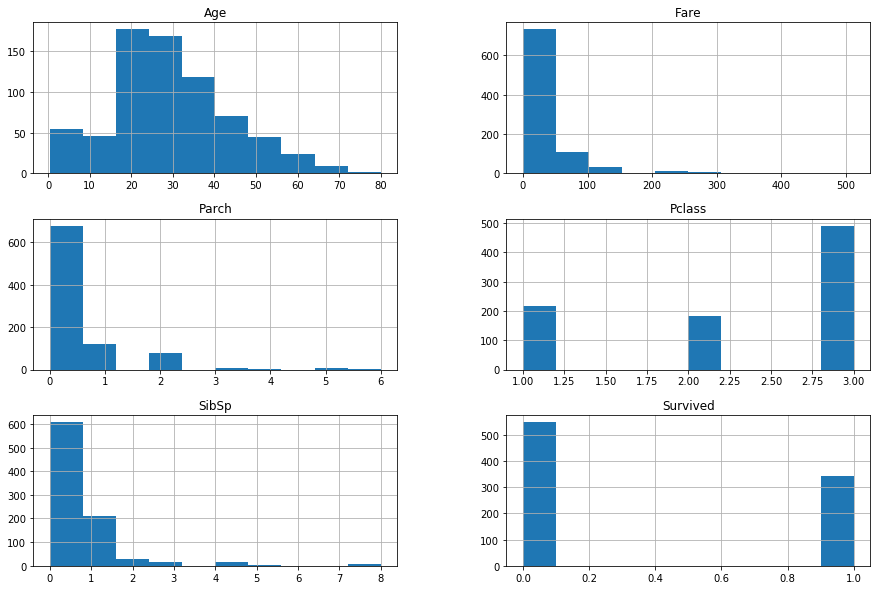

In [8]:
train_data[attrs_num].hist(bins=10,figsize=(15,10))
plt.show()

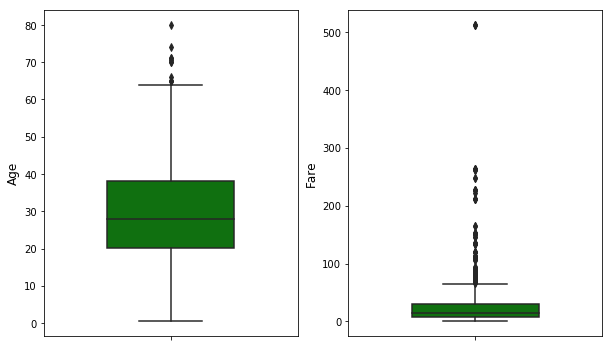

In [9]:
import seaborn as sns
plt.figure(figsize=(10,6))
for i in range(len(float_attrs)):
    plt.subplot(1,2,i+1)
    sns.boxplot(train_data[[float_attrs[i]]],orient='v',width=0.5,color='g')
    plt.ylabel(float_attrs[i],fontsize=12)

In [10]:
#age 有缺失---离散化
train_data['Age_cut']=pd.cut(train_data['Age'],[0.0,18.0,100.0],labels=['Children','Adult'])

In [11]:
train_data['Age_cut'].value_counts()

Adult       575
Children    139
Name: Age_cut, dtype: int64

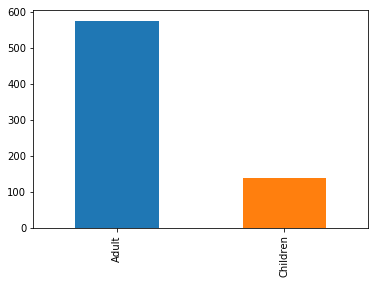

In [12]:
train_data['Age_cut'].value_counts().plot(kind='bar')

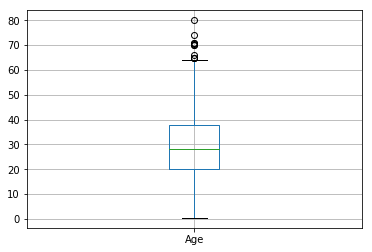

In [38]:
train_data[['Age']].boxplot()

In [20]:
train_data['Pclass'].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

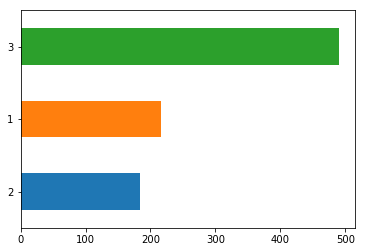

In [77]:
train_data['Pclass'].value_counts().sort_values().plot(kind='barh')

In [4]:
train_data['Survived'].value_counts()/len(train_data)

0    0.616162
1    0.383838
Name: Survived, dtype: float64

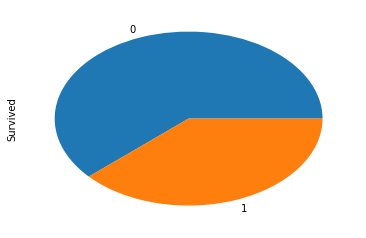

In [78]:
train_data['Survived'].value_counts().plot(kind='pie')

统计汇总——category

In [53]:
attrs_cate=np.setdiff1d(train_data.columns,attrs_num)
train_data[attrs_cate].describe()
#名字没有重复值

,Cabin,Embarked,Name,Sex,Ticket
count,204,889,891,891,891
unique,147,3,891,2,681
top,C23 C25 C27,S,"Taylor, Mr. Elmer Zebley",male,1601
freq,4,644,1,577,7


In [54]:
train_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [55]:
train_data['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

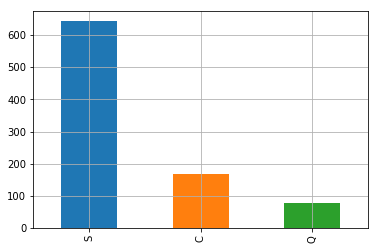

In [72]:
train_data['Embarked'].value_counts().plot(kind='bar',grid=True)

In [92]:
train_data['Ticket'].value_counts().head()

1601        7
347082      7
CA. 2343    7
347088      6
3101295     6
Name: Ticket, dtype: int64

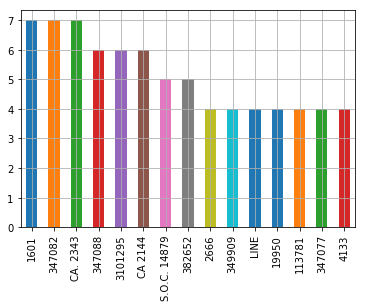

In [89]:
train_data['Ticket'].value_counts().head(15).plot(kind='bar',grid=True)

变量间关系分析

In [5]:
corr=train_data.corr()
corr['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [6]:
corr['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

In [12]:
attrs=train_data.columns.tolist()

In [13]:
attrs.remove('PassengerId')

In [14]:
len(attrs)

11

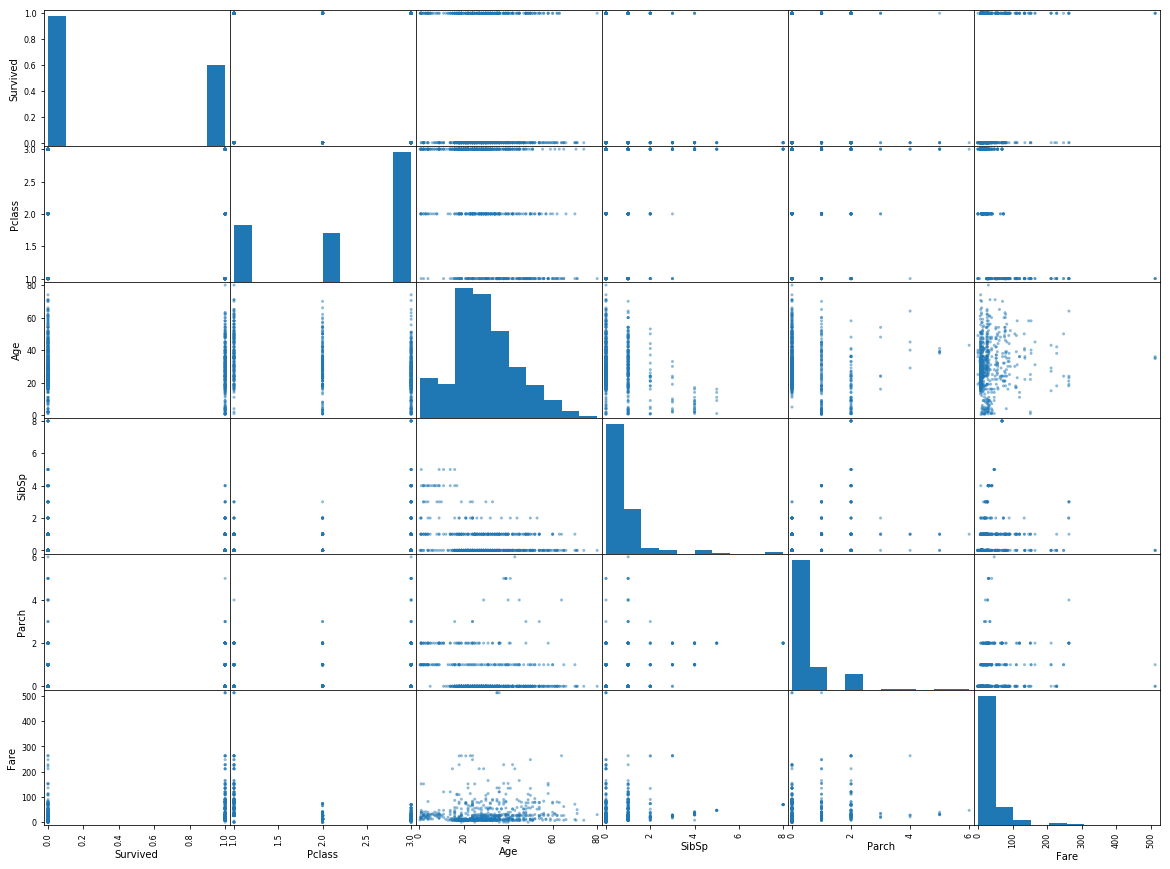

In [15]:
from pandas.plotting import scatter_matrix
#attrs=list(train_data.columns).remove('PassengerId')
scatter_matrix(train_data[attrs],figsize=(20,15))
plt.show()

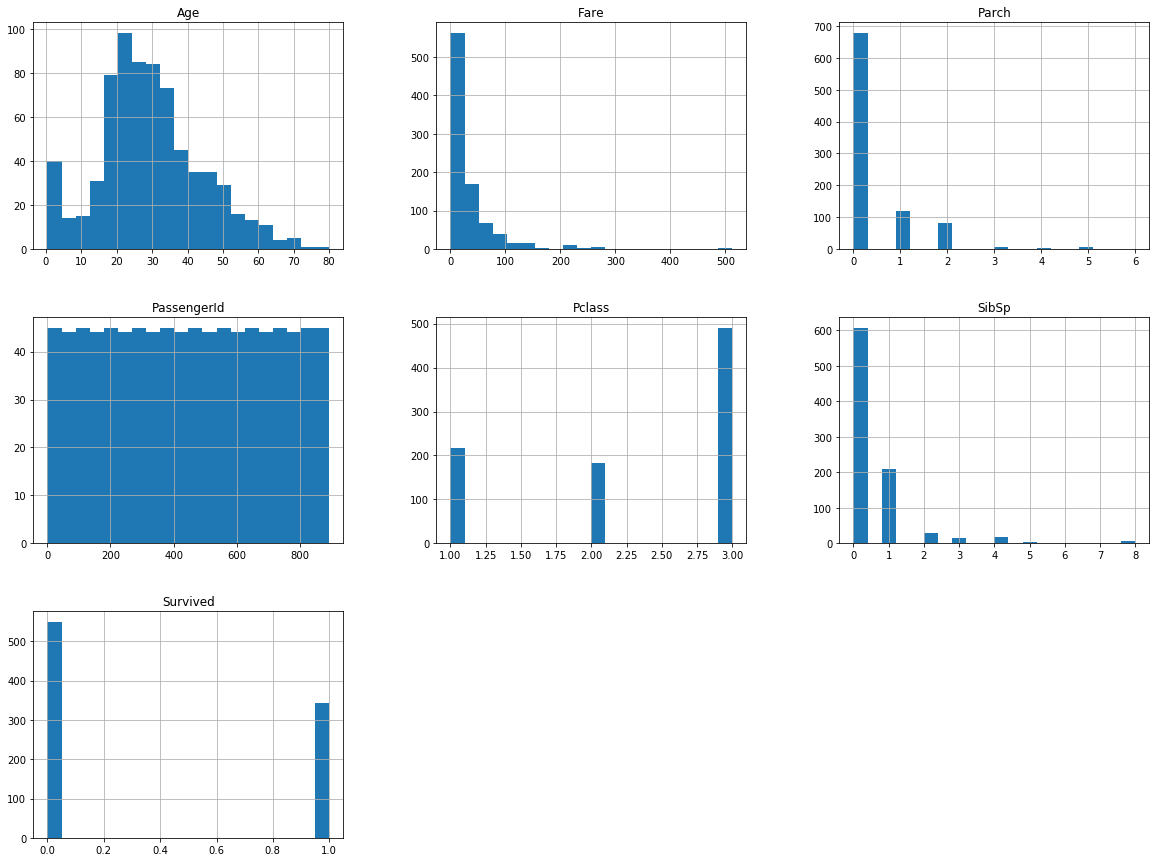

In [16]:
train_data.hist(bins=20,figsize=(20,15))
plt.show()

In [23]:
train_data[train_data['SibSp']==5]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
59,60,0,3,"Goodwin, Master. William Frederick",male,11.0,5,2,CA 2144,46.9,NaN,S
71,72,0,3,"Goodwin, Miss. Lillian Amy",female,16.0,5,2,CA 2144,46.9,NaN,S
386,387,0,3,"Goodwin, Master. Sidney Leonard",male,1.0,5,2,CA 2144,46.9,NaN,S
480,481,0,3,"Goodwin, Master. Harold Victor",male,9.0,5,2,CA 2144,46.9,NaN,S
683,684,0,3,"Goodwin, Mr. Charles Edward",male,14.0,5,2,CA 2144,46.9,NaN,S


In [8]:
train_data['Ticket'].describe()

count      891
unique     681
top       1601
freq         7
Name: Ticket, dtype: object

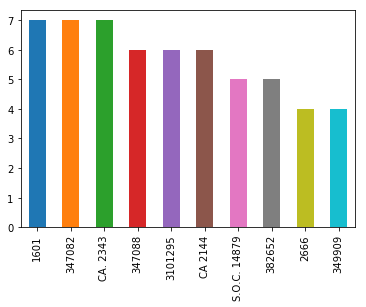

In [39]:
train_data['Ticket'].value_counts().head(10).plot(kind='bar')
plt.show()

In [10]:
len(train_data['Ticket'].unique())

681

各序号车票的数量

In [12]:
num_per_ticket=train_data['Ticket'].value_counts()

In [72]:
train_data_count.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_cut,num_of_tickets
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Adult,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Adult,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Adult,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Adult,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Adult,1


Prepare the Data

In [5]:
num_of_tickets=train_data[['Ticket']].groupby(train_data['Ticket']).count()
num_of_tickets.columns=['num_of_tickets']
#num_of_tickets.reset_index(inplace=True)

In [6]:
train_data_count=train_data.merge(num_of_tickets,left_on='Ticket',right_index=True,how='left')
len(train_data_count)

891

In [34]:
test_data_count=deal_ticket_fare(test_data)

In [7]:
def deal_ticket_fare(df):
    '''
    计算每张票有几人共享，以及没人花费的船票钱
    
    paramters:
        df--dataframe，待处理的数据表
        
    return:
        df_count--处理后，添加新列的数据表
    '''
    num_of_tickets=df[['Ticket']].groupby(df['Ticket']).count()
    num_of_tickets.columns=['num_of_tickets']
    df_count=df.merge(num_of_tickets,left_on='Ticket',right_index=True,how='left')
    df_count['fare_per_ticket']=df_count['Fare']/df_count['num_of_tickets']
    return df_count

In [35]:
train_data_count.drop(['Cabin'],axis=1,inplace=True)
#train_data_count.drop('Age_cut',axis=1,inplace=True)

In [37]:
test_data_count.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 13 columns):
PassengerId        418 non-null int64
Pclass             418 non-null int64
Name               418 non-null object
Sex                418 non-null object
Age                332 non-null float64
SibSp              418 non-null int64
Parch              418 non-null int64
Ticket             418 non-null object
Fare               417 non-null float64
Cabin              91 non-null object
Embarked           418 non-null object
num_of_tickets     418 non-null int64
fare_per_ticket    417 non-null float64
dtypes: float64(3), int64(5), object(5)
memory usage: 42.5+ KB


In [43]:
train_data_count['fare_per_ticket']=train_data_count['Fare']/train_data_count['num_of_tickets']

In [31]:
def miss_preparation(X,strategy='median'):
    '''
    填充数据中的缺失值，填充方式默认为中位数
    
    parameters:
        X :待处理的含有缺失值的列的数据
        strategy ：填充方式-mean,median,most_frequent
    return:
        X_fillna:处理缺失后的数据        
        imputer:处理缺失值的类，用于处理test 数据
        '''
    from sklearn.preprocessing import Imputer
    imputer=Imputer(strategy=strategy,axis=0)
    X_fillna=imputer.fit_transform(X)
    
    return X_fillna,imputer

In [41]:
# 构造 数据预处理 流水线
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.pipeline import Pipeline,FeatureUnion
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator,TransformerMixin

class DataFrameSelector(BaseEstimator,TransformerMixin):
    def __init__(self,attrs_name_list):
        self.attrs_name_list=attrs_name_list
    def fit(self,X,y=None):
        return self
    def transform(self,X):
        return X[self.attrs_name_list].values

cat_attrs=['Sex','Embarked']    
interval_num_attrs=['Pclass','SibSp','Parch','num_of_tickets']
ratio_num_attrs=['Age','Fare','fare_per_ticket']
cat_pipeline=Pipeline([('cat_dfs',DataFrameSelector(cat_attrs)),
             ('impute',SimpleImputer(strategy='most_frequent')),
              ('onehotencoder',OneHotEncoder() )            ])
interval_num_pipeline=Pipeline([('dfs',DataFrameSelector(interval_num_attrs)),
                      ('impute',SimpleImputer(strategy='median')) ])
ratio_num_pipeline=Pipeline([('dfs',DataFrameSelector(ratio_num_attrs)),
                    ('impute',SimpleImputer(strategy='median')),
                    ('std_scaler',StandardScaler())])
full_pipeline=FeatureUnion(transformer_list=[('cat_pipeline',cat_pipeline),('interval_num_pipeline',interval_num_pipeline),\
                                             ('ratio_num_pipeline',ratio_num_pipeline)])
train_data_count=deal_ticket_fare(train_data)
train_data_X=full_pipeline.fit_transform(train_data_count)

In [46]:
y_train=train_data_count['Survived'].values.ravel()

In [51]:
from sklearn.linear_model import LogisticRegression
lr_clf=LogisticRegression(penalty='l1')
#lr_clf.fit(train_data_X,y)

In [52]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(estimator=lr_clf,X=train_data_X,y=y_train,cv=10,n_jobs=4)

In [53]:
print (scores,'\nmean:',np.mean(scores))

[ 0.77777778  0.77777778  0.7752809   0.82022472  0.78651685  0.7752809
  0.78651685  0.79775281  0.80898876  0.82954545] 
mean: 0.793566280785


In [45]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [44]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
imputer.fit_transform(train_data_count[attrs_train])

array([[  3.    ,  22.    ,   1.    ,   0.    ,   1.    ,   7.25  ],
       [  1.    ,  38.    ,   1.    ,   0.    ,   1.    ,  71.2833],
       [  3.    ,  26.    ,   0.    ,   0.    ,   1.    ,   7.925 ],
       ..., 
       [  3.    ,  28.    ,   1.    ,   2.    ,   2.    ,  11.725 ],
       [  1.    ,  26.    ,   0.    ,   0.    ,   1.    ,  30.    ],
       [  3.    ,  32.    ,   0.    ,   0.    ,   1.    ,   7.75  ]])

In [36]:
train_data_count_fillna,imputer=miss_preparation(train_data_count[['Age']].values)

C:\Users\dell\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


In [11]:
train_data_count['Age'].fillna(train_data_count['Age'].agg('mean'),inplace=True)

In [14]:
train_data_count['Embarked'].fillna(train_data_count['Embarked'].agg('mode').values[0],inplace=True)

In [15]:
from sklearn.preprocessing import OneHotEncoder
one_hot_encoder=OneHotEncoder()
sexhotcoder=one_hot_encoder.fit_transform(train_data_count[['Sex','Embarked']])

In [16]:
sexhotcoder.toarray().shape

(891, 5)

In [52]:
np.c_[train_data_count['Age'].values,train_data_count['fare_per_ticket'].values,sexhotcoder.toarray()].shape

(891, 7)

In [19]:
attrs_train=['Pclass','Age','SibSp','Parch','num_of_tickets','fare_per_ticket']
X=np.c_[train_data_count[attrs_train].values,sexhotcoder.toarray()]
y=train_data_count[['Survived']].values.ravel()

In [20]:
print (X.shape,y.shape)

(891, 11) (891,)


In [24]:
X[:5]

array([[  3.    ,  22.    ,   1.    ,   0.    ,   1.    ,   7.25  ,
          0.    ,   1.    ,   0.    ,   0.    ,   1.    ],
       [  1.    ,  38.    ,   1.    ,   0.    ,   1.    ,  71.2833,
          1.    ,   0.    ,   1.    ,   0.    ,   0.    ],
       [  3.    ,  26.    ,   0.    ,   0.    ,   1.    ,   7.925 ,
          1.    ,   0.    ,   0.    ,   0.    ,   1.    ],
       [  1.    ,  35.    ,   1.    ,   0.    ,   2.    ,  26.55  ,
          1.    ,   0.    ,   0.    ,   0.    ,   1.    ],
       [  3.    ,  35.    ,   0.    ,   0.    ,   1.    ,   8.05  ,
          0.    ,   1.    ,   0.    ,   0.    ,   1.    ]])

In [12]:
type(train_data_count['Embarked'].agg('mode').values)

numpy.ndarray

In [135]:
train_data_count['Age'].describe()

count    891.000000
mean      29.699118
std       13.002015
min        0.420000
25%       22.000000
50%       29.699118
75%       35.000000
max       80.000000
Name: Age, dtype: float64

In [ ]:
def data_preparation(df,fill='mean'):
    df.drop()